## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import warnings
warnings.filterwarnings('ignore')

## Memory Optimization 

In [6]:
#https://www.kaggle.com/fabiendaniel/elo-world
#Function to load data into pandas and reduce memory usage

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    #loop for alll the columns in the dataframe 
    for col in df.columns:
        #get the datatype of the column
        col_type = df[col].dtypes
        #if the data type is numeric then only start changing the datatype
        #as it isnt much helpful for other data types 
        if col_type in numerics:
            #stores the min value of the column 
            c_min = df[col].min()
            #stores the maximum value of the column
            c_max = df[col].max()
            #for int type numerics
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            #for float type numerics 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/data 

/content/drive/MyDrive/data


In [8]:
ls

'Data Dictionary.xlsx'                      sample_submission.csv
 Data_Dictionary.xlsx                       test.csv
 historical_transactions.csv                train_aggregated_2.csv
 merchants.csv                              train_aggregated_3.csv
 merged_transactions_with_merchants_2.csv   train_aggregated_4.csv
 merged_transactions_with_merchants.csv     train.csv
 new_merchant_transactions.csv


## Loading dataframe

In [9]:
historical_transactions = reduce_mem_usage(pd.read_csv('historical_transactions.csv'))
new_merchant_transactions = reduce_mem_usage(pd.read_csv('new_merchant_transactions.csv'))
merchants = reduce_mem_usage(pd.read_csv('merchants.csv'))

Mem. usage decreased to 1749.11 Mb (43.7% reduction)
Mem. usage decreased to 114.20 Mb (45.5% reduction)
Mem. usage decreased to 30.32 Mb (46.0% reduction)


In [59]:
del new_merchant_transactions,merchants

In [12]:
new_merchant_transactions.to_csv('new_merchant_transactions')

In [60]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
#test =  reduce_mem_usage(pd.read_csv('test.csv'))

Mem. usage decreased to  4.04 Mb (56.2% reduction)


## Analysis

In [11]:
historical_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [13]:
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [14]:
new_merchant_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [15]:
for i in historical_transactions.columns:
  print('The null value present in {} feature of historical_transactions is {}'.format(i,historical_transactions[i].isnull().any()))

The null value present in authorized_flag feature of historical_transactions is False
The null value present in card_id feature of historical_transactions is False
The null value present in city_id feature of historical_transactions is False
The null value present in category_1 feature of historical_transactions is False
The null value present in installments feature of historical_transactions is False
The null value present in category_3 feature of historical_transactions is True
The null value present in merchant_category_id feature of historical_transactions is False
The null value present in merchant_id feature of historical_transactions is True
The null value present in month_lag feature of historical_transactions is False
The null value present in purchase_amount feature of historical_transactions is False
The null value present in purchase_date feature of historical_transactions is False
The null value present in category_2 feature of historical_transactions is True
The null val

In [16]:
for i in merchants.columns:
  print('The null value present in {} feature of merchants is {}'.format(i,merchants[i].isnull().any()))

The null value present in merchant_id feature of merchants is False
The null value present in merchant_group_id feature of merchants is False
The null value present in merchant_category_id feature of merchants is False
The null value present in subsector_id feature of merchants is False
The null value present in numerical_1 feature of merchants is False
The null value present in numerical_2 feature of merchants is False
The null value present in category_1 feature of merchants is False
The null value present in most_recent_sales_range feature of merchants is False
The null value present in most_recent_purchases_range feature of merchants is False
The null value present in avg_sales_lag3 feature of merchants is True
The null value present in avg_purchases_lag3 feature of merchants is False
The null value present in active_months_lag3 feature of merchants is False
The null value present in avg_sales_lag6 feature of merchants is True
The null value present in avg_purchases_lag6 feature of

In [22]:
#with the mean value 
merchants['avg_sales_lag3'] = merchants['avg_sales_lag3'].fillna(merchants['avg_sales_lag3'].mean())
merchants['avg_sales_lag6'] = merchants['avg_sales_lag6'].fillna(merchants['avg_sales_lag6'].mean())
merchants['avg_sales_lag12'] = merchants['avg_sales_lag12'].fillna(merchants['avg_sales_lag12'].mean())

In [23]:
for i in merchants.columns:
  print('The null value present in {} feature of merchants is {}'.format(i,merchants[i].isnull().any()))

The null value present in merchant_id feature of merchants is False
The null value present in merchant_group_id feature of merchants is False
The null value present in merchant_category_id feature of merchants is False
The null value present in subsector_id feature of merchants is False
The null value present in numerical_1 feature of merchants is False
The null value present in numerical_2 feature of merchants is False
The null value present in category_1 feature of merchants is False
The null value present in most_recent_sales_range feature of merchants is False
The null value present in most_recent_purchases_range feature of merchants is False
The null value present in avg_sales_lag3 feature of merchants is False
The null value present in avg_purchases_lag3 feature of merchants is False
The null value present in active_months_lag3 feature of merchants is False
The null value present in avg_sales_lag6 feature of merchants is False
The null value present in avg_purchases_lag6 feature 

In [17]:
for i in new_merchant_transactions.columns:
  print('The null value present in {} feature of new_merchant_transactions is {}'.format(i,new_merchant_transactions[i].isnull().any()))

The null value present in authorized_flag feature of new_merchant_transactions is False
The null value present in card_id feature of new_merchant_transactions is False
The null value present in city_id feature of new_merchant_transactions is False
The null value present in category_1 feature of new_merchant_transactions is False
The null value present in installments feature of new_merchant_transactions is False
The null value present in category_3 feature of new_merchant_transactions is True
The null value present in merchant_category_id feature of new_merchant_transactions is False
The null value present in merchant_id feature of new_merchant_transactions is True
The null value present in month_lag feature of new_merchant_transactions is False
The null value present in purchase_amount feature of new_merchant_transactions is False
The null value present in purchase_date feature of new_merchant_transactions is False
The null value present in category_2 feature of new_merchant_transacti

## Make merged dataframe 

In [32]:
merchants = merchants[['merchant_id', 
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']]
historical_transactions = historical_transactions[['authorized_flag', 'card_id', 'installments',
       'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date']]
new_merchant_transactions = new_merchant_transactions[['authorized_flag', 'card_id','installments',
        'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date']]

In [33]:
for i in merchants.columns:
  print('The null value present in {} feature of merchants is {}'.format(i,merchants[i].isnull().any()))

The null value present in merchant_id feature of merchants is False
The null value present in most_recent_sales_range feature of merchants is False
The null value present in most_recent_purchases_range feature of merchants is False
The null value present in avg_sales_lag3 feature of merchants is False
The null value present in avg_purchases_lag3 feature of merchants is False
The null value present in active_months_lag3 feature of merchants is False
The null value present in avg_sales_lag6 feature of merchants is False
The null value present in avg_purchases_lag6 feature of merchants is False
The null value present in active_months_lag6 feature of merchants is False
The null value present in avg_sales_lag12 feature of merchants is False
The null value present in avg_purchases_lag12 feature of merchants is False
The null value present in active_months_lag12 feature of merchants is False


In [34]:
for i in new_merchant_transactions.columns:
  print('The null value present in {} feature of new_merchant_transactions is {}'.format(i,new_merchant_transactions[i].isnull().any()))

The null value present in authorized_flag feature of new_merchant_transactions is False
The null value present in card_id feature of new_merchant_transactions is False
The null value present in installments feature of new_merchant_transactions is False
The null value present in merchant_id feature of new_merchant_transactions is True
The null value present in month_lag feature of new_merchant_transactions is False
The null value present in purchase_amount feature of new_merchant_transactions is False
The null value present in purchase_date feature of new_merchant_transactions is False


In [35]:
for i in historical_transactions.columns:
  print('The null value present in {} feature of historical_transactions is {}'.format(i,historical_transactions[i].isnull().any()))

The null value present in authorized_flag feature of historical_transactions is False
The null value present in card_id feature of historical_transactions is False
The null value present in installments feature of historical_transactions is False
The null value present in merchant_id feature of historical_transactions is True
The null value present in month_lag feature of historical_transactions is False
The null value present in purchase_amount feature of historical_transactions is False
The null value present in purchase_date feature of historical_transactions is False


In [36]:
def isin(a,b):
    From = pd.DataFrame(a)
    To = pd.DataFrame(b)
    return(np.mean(From[0].isin(To[0])))

In [39]:
print(" In train and test with card ID",isin(train["card_id"].unique(),test["card_id"].unique()))
#historical
print(" In train and historical_transactions with card ID",isin(train["card_id"].unique(),historical_transactions["card_id"].unique()))
print(" In test and historical_transactions with card ID",isin(test["card_id"].unique(),historical_transactions["card_id"].unique()))
print(" In new_merchant_transactions and historical_transactions with card ID",isin(new_merchant_transactions["card_id"].unique(),historical_transactions["card_id"].unique()))
print(" In new_merchant_transactions and historical_transactions with Merchant ID",isin(new_merchant_transactions["merchant_id"].unique(),historical_transactions["merchant_id"].unique()))
print(" In merchant and historical_transactions with Merchant ID",isin(merchants["merchant_id"].unique(),historical_transactions["merchant_id"].unique()))
#merchant
print(" In merchant and new_merchant_transactions with Merchant ID",isin(merchants["merchant_id"].unique(),new_merchant_transactions["merchant_id"].unique()))
#newmerchant
print(" In train and new_merchant_transactions with card ID",isin(train["card_id"].unique(),new_merchant_transactions["card_id"].unique()))

 In train and test with card ID 0.0
 In train and historical_transactions with card ID 1.0
 In test and historical_transactions with card ID 1.0
 In new_merchant_transactions and historical_transactions with card ID 1.0
 In new_merchant_transactions and historical_transactions with Merchant ID 0.963198160350241
 In merchant and historical_transactions with Merchant ID 0.9751309643699216
 In merchant and new_merchant_transactions with Merchant ID 0.6757522420084092
 In train and new_merchant_transactions with card ID 0.8913860645710862


In [40]:
historical_transactions = historical_transactions.append(new_merchant_transactions, ignore_index=True)

In [41]:
merged_transactions = pd.merge(historical_transactions, merchants, on='merchant_id', how='left')

In [43]:
for i in historical_transactions.columns:
  print('The null value present in {} feature of historical_transactions is {}'.format(i,historical_transactions[i].isnull().any()))

The null value present in authorized_flag feature of historical_transactions is False
The null value present in card_id feature of historical_transactions is False
The null value present in installments feature of historical_transactions is False
The null value present in merchant_id feature of historical_transactions is True
The null value present in month_lag feature of historical_transactions is False
The null value present in purchase_amount feature of historical_transactions is False
The null value present in purchase_date feature of historical_transactions is False


In [42]:
for i in merged_transactions.columns:
  print('The null value present in {} feature of merged_transactions is {}'.format(i,merged_transactions[i].isnull().any()))

The null value present in authorized_flag feature of merged_transactions is False
The null value present in card_id feature of merged_transactions is False
The null value present in installments feature of merged_transactions is False
The null value present in merchant_id feature of merged_transactions is True
The null value present in month_lag feature of merged_transactions is False
The null value present in purchase_amount feature of merged_transactions is False
The null value present in purchase_date feature of merged_transactions is False
The null value present in most_recent_sales_range feature of merged_transactions is True
The null value present in most_recent_purchases_range feature of merged_transactions is True
The null value present in avg_sales_lag3 feature of merged_transactions is True
The null value present in avg_purchases_lag3 feature of merged_transactions is True
The null value present in active_months_lag3 feature of merged_transactions is True
The null value prese

In [44]:
merged_transactions

,authorized_flag,card_id,installments,merchant_id,month_lag,purchase_amount,purchase_date,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,Y,C_ID_4e6213e9bc,0,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,A,A,1.08,1.082451,3.0,1.14,1.114135,6.0,1.19,1.156844,12.0
1,Y,C_ID_4e6213e9bc,0,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,A,A,1.06,1.052071,3.0,1.06,1.058605,6.0,1.05,1.062087,12.0
2,Y,C_ID_4e6213e9bc,0,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,C,C,0.98,0.974653,3.0,0.98,0.967058,6.0,0.97,0.956668,12.0
3,Y,C_ID_4e6213e9bc,0,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,D,C,1.00,1.053443,3.0,0.88,0.897406,6.0,0.86,0.864394,12.0
4,Y,C_ID_4e6213e9bc,0,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,A,A,1.08,1.082451,3.0,1.14,1.114135,6.0,1.19,1.156844,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32328670,Y,C_ID_1320dee851,0,M_ID_7754b67f3b,2,-0.701660,2018-04-06 14:36:52,E,D,1.28,1.156733,3.0,1.39,1.185430,6.0,1.45,1.172737,12.0
32328671,Y,C_ID_f112aa3381,0,M_ID_da063195b7,2,-0.694336,2018-03-07 13:19:18,D,D,0.98,0.972452,3.0,0.90,0.885124,6.0,0.88,0.875207,12.0
32328672,Y,C_ID_bd97b86450,1,M_ID_9a9ccb6544,1,-0.621094,2018-03-05 12:04:56,D,C,0.98,1.033403,3.0,1.01,1.042102,6.0,0.99,1.028358,12.0
32328673,Y,C_ID_c0513fd84f,0,M_ID_40c28d596f,1,-0.656738,2018-03-09 14:47:05,D,D,1.04,1.092105,3.0,0.94,1.052005,6.0,0.89,1.024682,12.0


In [47]:
#with the mean value 
merged_transactions['avg_purchases_lag12'] = merged_transactions['avg_purchases_lag12'].fillna(merged_transactions['avg_purchases_lag12'].mean())
merged_transactions['avg_sales_lag12'] = merged_transactions['avg_sales_lag12'].fillna(merged_transactions['avg_sales_lag12'].mean())
merged_transactions['active_months_lag12'] = merged_transactions['active_months_lag12'].fillna(merged_transactions['active_months_lag12'].mean())
#with the mean value 
merged_transactions['avg_sales_lag6'] = merged_transactions['avg_sales_lag6'].fillna(merged_transactions['avg_sales_lag6'].mean())
merged_transactions['avg_purchases_lag6'] = merged_transactions['avg_purchases_lag6'].fillna(merged_transactions['avg_purchases_lag6'].mean())
merged_transactions['active_months_lag6'] = merged_transactions['active_months_lag6'].fillna(merged_transactions['active_months_lag6'].mean())
#with the mean value 
merged_transactions['avg_sales_lag3'] = merged_transactions['avg_sales_lag3'].fillna(merged_transactions['avg_sales_lag3'].mean())
merged_transactions['avg_purchases_lag3'] = merged_transactions['avg_purchases_lag3'].fillna(merged_transactions['avg_purchases_lag3'].mean())
merged_transactions['active_months_lag3'] = merged_transactions['active_months_lag3'].fillna(merged_transactions['active_months_lag3'].mean())

In [48]:
#with the mean value 
merged_transactions['most_recent_sales_range'] = merged_transactions['most_recent_sales_range'].fillna(lambda x: pd.Series.mode(x)[0])
merged_transactions['most_recent_purchases_range'] = merged_transactions['most_recent_purchases_range'].fillna(lambda x: pd.Series.mode(x)[0])

In [49]:
for i in merged_transactions.columns:
  print('The null value present in {} feature of merged_transactions is {}'.format(i,merged_transactions[i].isnull().any()))

The null value present in authorized_flag feature of merged_transactions is False
The null value present in card_id feature of merged_transactions is False
The null value present in installments feature of merged_transactions is False
The null value present in merchant_id feature of merged_transactions is True
The null value present in month_lag feature of merged_transactions is False
The null value present in purchase_amount feature of merged_transactions is False
The null value present in purchase_date feature of merged_transactions is False
The null value present in most_recent_sales_range feature of merged_transactions is False
The null value present in most_recent_purchases_range feature of merged_transactions is False
The null value present in avg_sales_lag3 feature of merged_transactions is False
The null value present in avg_purchases_lag3 feature of merged_transactions is False
The null value present in active_months_lag3 feature of merged_transactions is False
The null value 

In [50]:
merged_transactions.to_csv('merged_transactions_with_merchants.csv')

In [51]:
del merged_transactions

In [52]:
merged_transactions =  reduce_mem_usage(pd.read_csv('merged_transactions_with_merchants.csv'))

Mem. usage decreased to 3113.93 Mb (33.6% reduction)


In [53]:
del historical_transactions,train,test

In [54]:
merged_transactions

,Unnamed: 0,authorized_flag,card_id,installments,merchant_id,month_lag,purchase_amount,purchase_date,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,0,Y,C_ID_4e6213e9bc,0,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,A,A,1.08,1.082451,3.0,1.14,1.114135,6.0,1.19,1.156844,12.0
1,1,Y,C_ID_4e6213e9bc,0,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,A,A,1.06,1.052071,3.0,1.06,1.058605,6.0,1.05,1.062087,12.0
2,2,Y,C_ID_4e6213e9bc,0,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,C,C,0.98,0.974653,3.0,0.98,0.967058,6.0,0.97,0.956668,12.0
3,3,Y,C_ID_4e6213e9bc,0,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,D,C,1.00,1.053443,3.0,0.88,0.897406,6.0,0.86,0.864394,12.0
4,4,Y,C_ID_4e6213e9bc,0,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,A,A,1.08,1.082451,3.0,1.14,1.114135,6.0,1.19,1.156844,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32328670,32328670,Y,C_ID_1320dee851,0,M_ID_7754b67f3b,2,-0.701660,2018-04-06 14:36:52,E,D,1.28,1.156733,3.0,1.39,1.185430,6.0,1.45,1.172737,12.0
32328671,32328671,Y,C_ID_f112aa3381,0,M_ID_da063195b7,2,-0.694336,2018-03-07 13:19:18,D,D,0.98,0.972452,3.0,0.90,0.885124,6.0,0.88,0.875207,12.0
32328672,32328672,Y,C_ID_bd97b86450,1,M_ID_9a9ccb6544,1,-0.621094,2018-03-05 12:04:56,D,C,0.98,1.033403,3.0,1.01,1.042102,6.0,0.99,1.028358,12.0
32328673,32328673,Y,C_ID_c0513fd84f,0,M_ID_40c28d596f,1,-0.656738,2018-03-09 14:47:05,D,D,1.04,1.092105,3.0,0.94,1.052005,6.0,0.89,1.024682,12.0


In [100]:
merged_transactions.avg_purchases_lag3.median()

1.0278194

In [55]:
#convert the yes and no to 1 and 0
merged_transactions['authorized_flag'] = merged_transactions['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [66]:
merged_transactions_1 = merged_transactions.groupby('card_id', as_index=False)[['avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12','installments','authorized_flag','month_lag']].mean()

In [67]:
merged_transactions_2 = merged_transactions.groupby('card_id', as_index=False)[['most_recent_sales_range', 'most_recent_purchases_range']].agg(lambda x: pd.Series.mode(x)[0])

In [68]:
train_aggregated = pd.merge(train, merged_transactions_1, on='card_id', how= 'left')
train_aggregated = pd.merge(train_aggregated, merged_transactions_2, on='card_id', how= 'left')
train_aggregated

,first_active_month,card_id,feature_1,feature_2,feature_3,target,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,installments,authorized_flag,month_lag,most_recent_sales_range,most_recent_purchases_range
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312,3.774948,inf,3.000000,9.014147,inf,5.996094,9.760918,inf,11.867188,0.013889,0.954861,-3.440972,C,A
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822,1.220108,1.396565,3.000000,2.051779,4.167833,6.000000,2.203369,4.525698,11.859375,1.606469,0.970350,-4.814016,A,A
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988,1.141333,1.288235,3.000000,1.181556,1.377172,6.000000,1.193111,1.396253,11.843750,0.000000,0.955556,-8.444444,A,A
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456,1.570312,2.127199,3.000000,1.694375,2.404358,6.000000,1.706979,2.438380,11.398438,1.072917,1.000000,-2.520833,A,A
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790,3.048469,inf,3.000000,3.799761,inf,5.996094,3.884929,inf,11.687500,1.269663,0.971910,-0.691011,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740234,2.289000,3.561794,3.000000,2.616333,4.248336,6.000000,2.626500,4.310101,10.914062,0.033333,0.900000,-1.716667,C,C
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312988,1.099583,1.081125,2.958984,1.303125,1.247434,5.894531,1.706458,1.530759,11.773438,0.020833,0.854167,-3.770833,B,B
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093506,1.747500,1.429029,3.000000,2.328261,1.647526,6.000000,2.454891,1.670208,11.859375,1.250000,0.934783,-3.608696,B,C
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.675781,1.425151,1.799018,3.000000,1.553333,2.020075,6.000000,1.583030,2.057491,11.515625,0.000000,0.909091,-2.575758,A,A


In [77]:
train_aggregated['avg_purchases_lag3'] = train_aggregated['avg_purchases_lag3'].round()
train_aggregated['avg_purchases_lag6'] = train_aggregated['avg_purchases_lag6'].round()
train_aggregated['avg_purchases_lag12'] = train_aggregated['avg_purchases_lag12'].round()


In [88]:
from numpy import inf

In [101]:
train_aggregated['avg_purchases_lag3'] = train_aggregated['avg_purchases_lag3'].replace(inf, train_aggregated['avg_purchases_lag3'].median())
train_aggregated['avg_purchases_lag6'] = train_aggregated['avg_purchases_lag6'].replace(inf, train_aggregated['avg_purchases_lag6'].median())
train_aggregated['avg_purchases_lag12'] = train_aggregated['avg_purchases_lag12'].replace(inf, train_aggregated['avg_purchases_lag12'].median())

In [102]:
train_aggregated.avg_purchases_lag12.max()

12318.0

In [103]:
train_aggregated

,first_active_month,card_id,feature_1,feature_2,feature_3,target,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,installments,authorized_flag,month_lag,most_recent_sales_range,most_recent_purchases_range
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312,3.774948,2.0,3.000000,9.014147,3.0,5.996094,9.760918,3.0,11.867188,0.013889,0.954861,-3.440972,C,A
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822,1.220108,1.0,3.000000,2.051779,4.0,6.000000,2.203369,5.0,11.859375,1.606469,0.970350,-4.814016,A,A
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988,1.141333,1.0,3.000000,1.181556,1.0,6.000000,1.193111,1.0,11.843750,0.000000,0.955556,-8.444444,A,A
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456,1.570312,2.0,3.000000,1.694375,2.0,6.000000,1.706979,2.0,11.398438,1.072917,1.000000,-2.520833,A,A
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790,3.048469,2.0,3.000000,3.799761,3.0,5.996094,3.884929,3.0,11.687500,1.269663,0.971910,-0.691011,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740234,2.289000,4.0,3.000000,2.616333,4.0,6.000000,2.626500,4.0,10.914062,0.033333,0.900000,-1.716667,C,C
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312988,1.099583,1.0,2.958984,1.303125,1.0,5.894531,1.706458,2.0,11.773438,0.020833,0.854167,-3.770833,B,B
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093506,1.747500,1.0,3.000000,2.328261,2.0,6.000000,2.454891,2.0,11.859375,1.250000,0.934783,-3.608696,B,C
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.675781,1.425151,2.0,3.000000,1.553333,2.0,6.000000,1.583030,2.0,11.515625,0.000000,0.909091,-2.575758,A,A


In [107]:
train_aggregated['active_months_lag3'] = train_aggregated['active_months_lag3'].round(0)
train_aggregated['active_months_lag6'] = train_aggregated['active_months_lag6'].round(0)
train_aggregated['active_months_lag12'] = train_aggregated['active_months_lag12'].round(0)


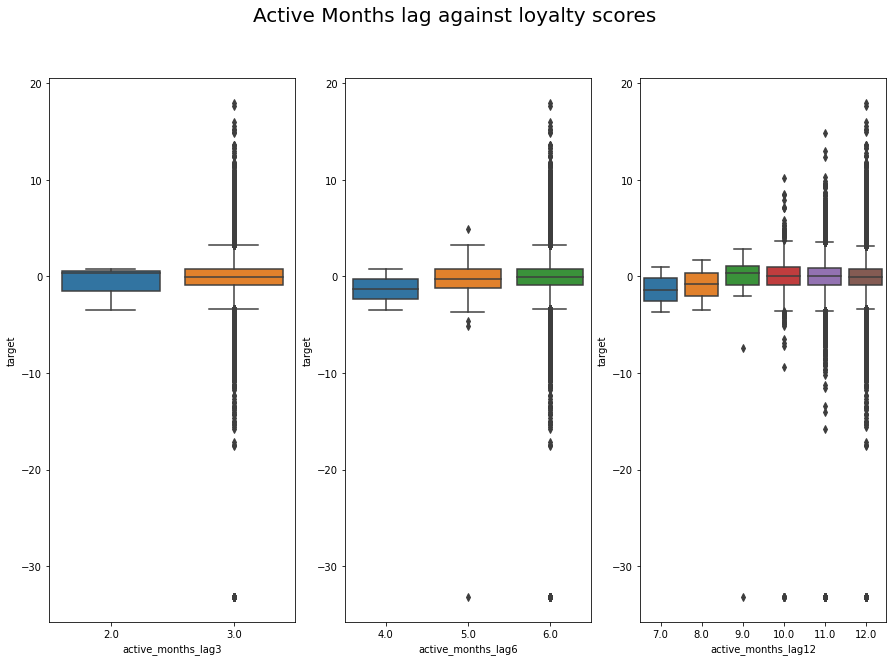

In [108]:
#refer for multiple plots:-https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, ax = plt.subplots(1,3, figsize = (15,10))
sns.boxplot(x=train_aggregated['active_months_lag3'], y=train_aggregated['target'], ax = ax[0])
sns.boxplot(x=train_aggregated['active_months_lag6'], y=train_aggregated['target'], ax = ax[1])
sns.boxplot(x=train_aggregated['active_months_lag12'], y=train_aggregated['target'], ax = ax[2])
plt.suptitle('Active Months lag against loyalty scores', fontsize = 20)
plt.show()

Cards with less number of active months have a lower score 


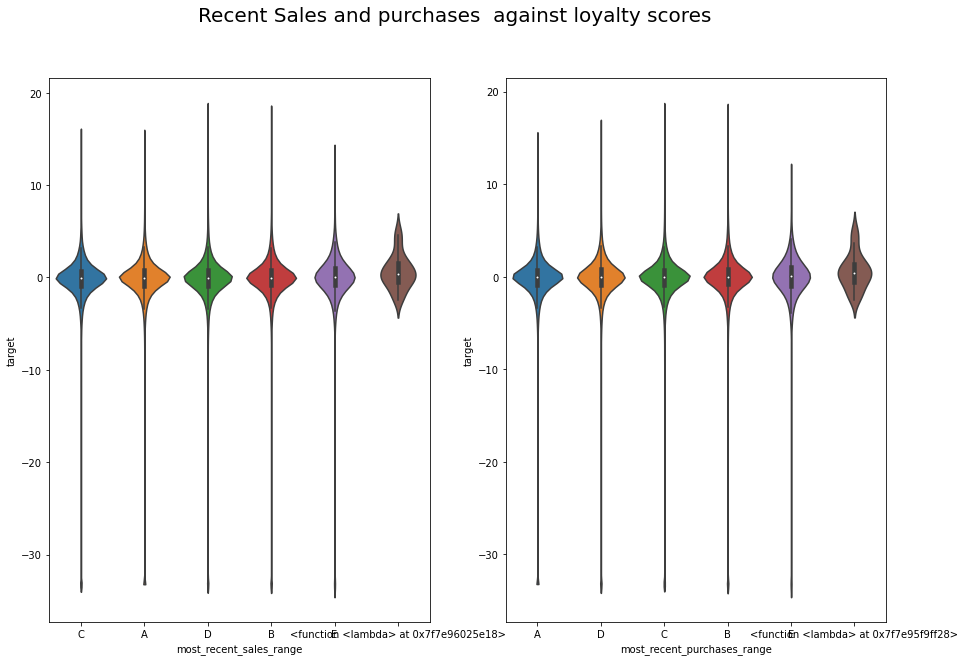

In [70]:
fig, ax = plt.subplots(1,2, figsize = (15,10))
sns.violinplot(x=train_aggregated['most_recent_sales_range'], y=train_aggregated['target'], ax = ax[0])
sns.violinplot(x=train_aggregated['most_recent_purchases_range'], y=train_aggregated['target'], ax = ax[1])
plt.suptitle('Recent Sales and purchases  against loyalty scores', fontsize = 20)
plt.show()

Most recent sales and purchases has no visible difference for predicting loyality scores but may be the algorithms fiinds it helpful

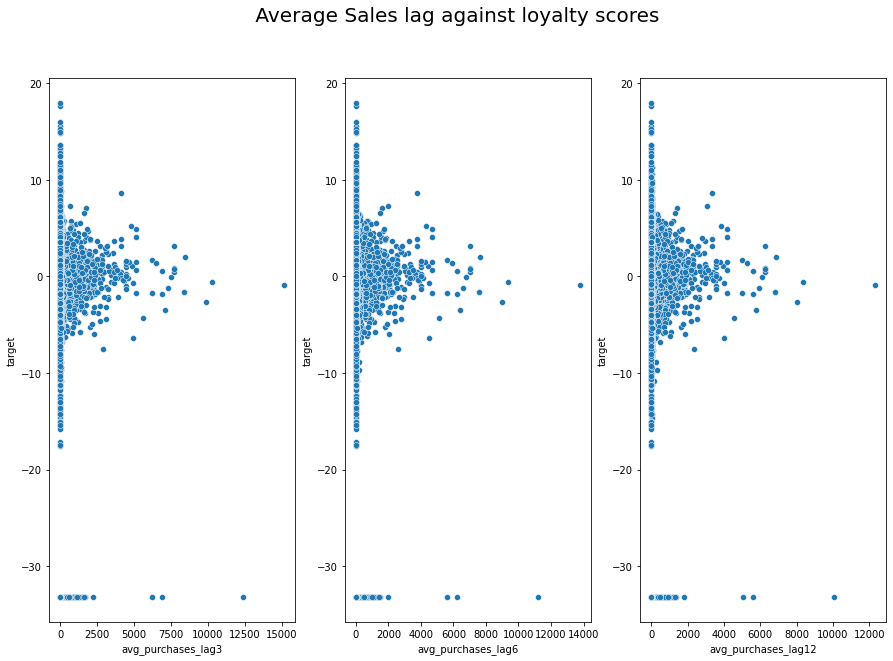

In [106]:
fig, ax = plt.subplots(1,3, figsize = (15,10))
sns.scatterplot(x=train_aggregated['avg_purchases_lag3'], y=train_aggregated['target'],ax = ax[0])
sns.scatterplot(x=train_aggregated['avg_purchases_lag6'], y=train_aggregated['target'],ax = ax[1])
sns.scatterplot(x=train_aggregated['avg_purchases_lag12'], y=train_aggregated['target'],ax = ax[2])
plt.suptitle(' Average Sales lag against loyalty scores', fontsize = 20)
plt.show()

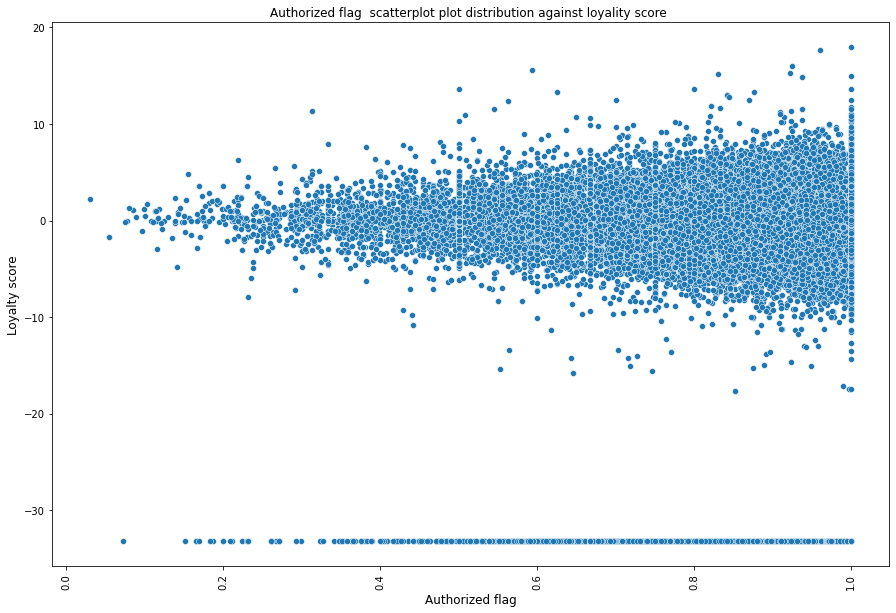

In [72]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="authorized_flag", y='target', data=train_aggregated)
plt.xticks(rotation='vertical')
plt.xlabel('Authorized flag', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Authorized flag  scatterplot plot distribution against loyality score ")
plt.show()